## Case Study 1 - Honey Production in the US

Source Credit : https://www.kaggle.com/jessicali9530/honey-production

#### Context
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

#### Content
The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered. Click here for the original page containing the data along with related datasets such as Honey Bee Colonies and Cost of Pollination. Data wrangling was performed in order to clean the dataset. honeyproduction.csv is the final tidy dataset suitable for analysis. The three other datasets (which include "honeyraw" in the title) are the original raw data downloaded from the site. They are uploaded to this page along with the "Wrangling The Honey Production Dataset" kernel as an example to show users how data can be wrangled into a cleaner format. Useful metadata on certain variables of the honeyproduction dataset is provided below:

  - **numcol**: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which  
    honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
  - **yieldpercol**: Honey yield per colony. Unit is pounds
  - **totalprod**: Total production (numcol x yieldpercol). Unit is pounds
  - **stocks**: Refers to stocks held by producers. Unit is pounds
  - **priceperlb**: Refers to average price per pound based on expanded sales. Unit is dollars.
  - **prodvalue**: Value of production (totalprod x priceperlb). Unit is dollars.
  - **Other useful information**: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual  
     operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states 
     will not equal U.S. level value of production.


#### Acknowledgements
Honey production data was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture. The beautiful banner photo was by Eric Ward on Unsplash.

#### Inspiration for study
   - How has honey production yield changed from 1998 to 2012?
   - Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey 
     yield?
   - Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which 
     was when concern over Colony Collapse Disorder spread nationwide?
   - Are there any patterns that can be observed between total honey production and value of production every year?
   - How has value of production, which in some sense could be tied to demand, changed every year?


#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.transforms as transforms
#
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
#
import warnings
warnings.filterwarnings("ignore")

#### Import the honeyproduction.csv file

In [163]:
mydata = pd.read_csv("honeyproduction.csv")

#### Explore the data for non-null and extreme values

In [164]:
mydata.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [165]:
mydata.shape

(626, 8)

In [167]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


In [168]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


#### How many States are included in the dataset?

In [169]:
mydata['state'].nunique()

44

#### Which are he States that are included in this dataset?

In [170]:
mydata['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

#### What timespan (in years?) is covered for honey production dataset?

In [171]:
mydata['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

In [172]:
mydata['year'].nunique()

15

In [173]:
# Data records we should have ideally
44*15

660

#### Calculate the average production for each state across all years

In [178]:
mydata[['state', 'totalprod']].groupby('state').mean().round()

,totalprod
state,
AL,432000.0
AR,1368000.0
AZ,1012000.0
CA,11550000.0
CO,1200000.0
FL,10980000.0
GA,2530000.0
HI,640000.0
IA,1092000.0


#### Convert total production units in MLbs

In [180]:
mydata['totalprod_M']=(mydata['totalprod']/1000000.).round()
mydata.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,totalprod_M
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,1.0
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,3.0
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,3.0
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,37.0
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,2.0


#### Which State has seen highest volume in production, and in which year?

In [183]:
mydata[mydata['totalprod'] == mydata['totalprod'].max()]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,totalprod_M
532,ND,510000.0,91,46410000.0,12995000.0,1.5,69615000.0,2010,46.0


#### What is the average yield per colony , for each year?

In [184]:
mydata[['year', 'yieldpercol']].groupby('year').mean().round()

,yieldpercol
year,
1998,70.0
1999,65.0
2000,68.0
2001,65.0
2002,67.0
2003,63.0
2004,65.0
2005,64.0
2006,62.0


#### Is there correlation between any 2 Numeric variables? Test for the same using Visual techniques

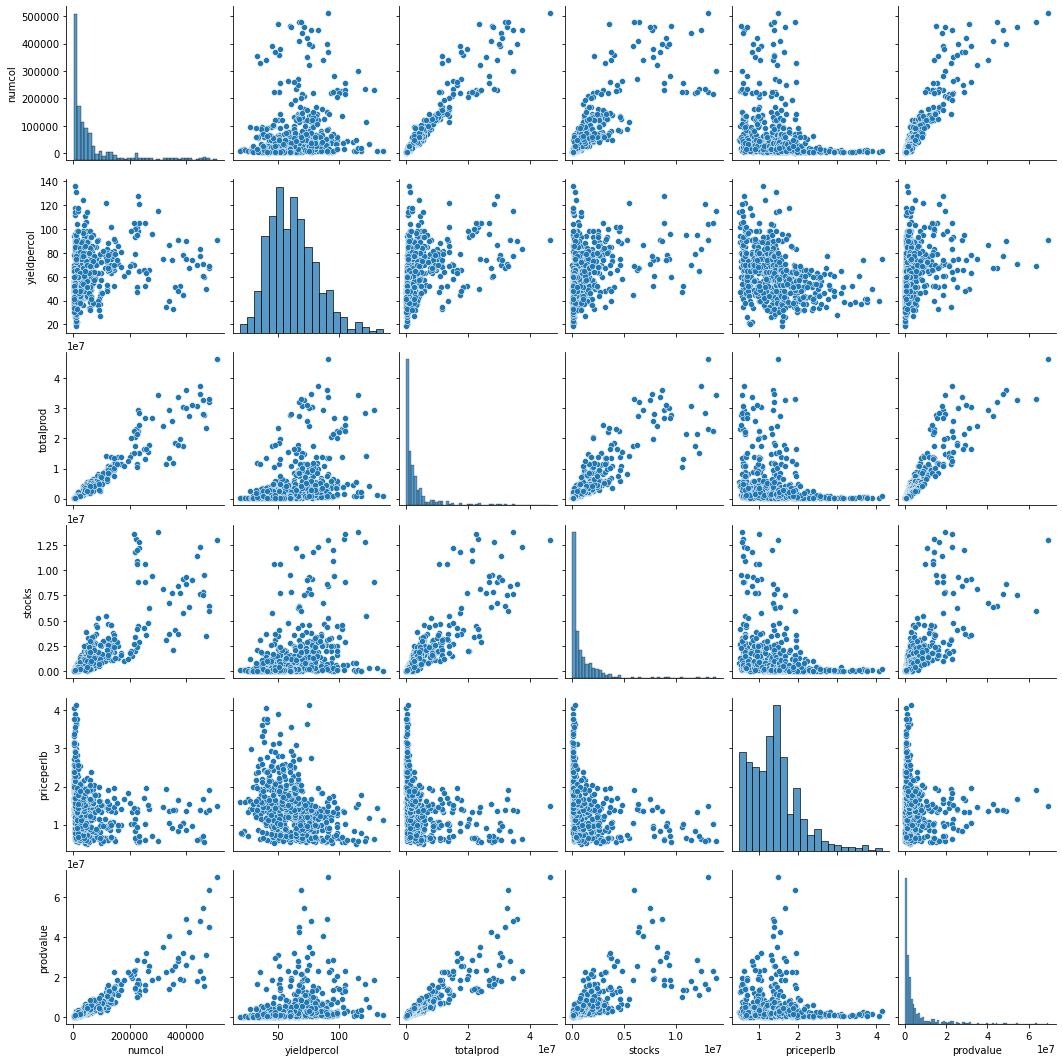

In [185]:
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']]);

In [186]:
cor = mydata[['numcol', 
              'yieldpercol', 
              'totalprod', 
              'stocks', 
              'priceperlb', 
              'prodvalue']].corr()

cor

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


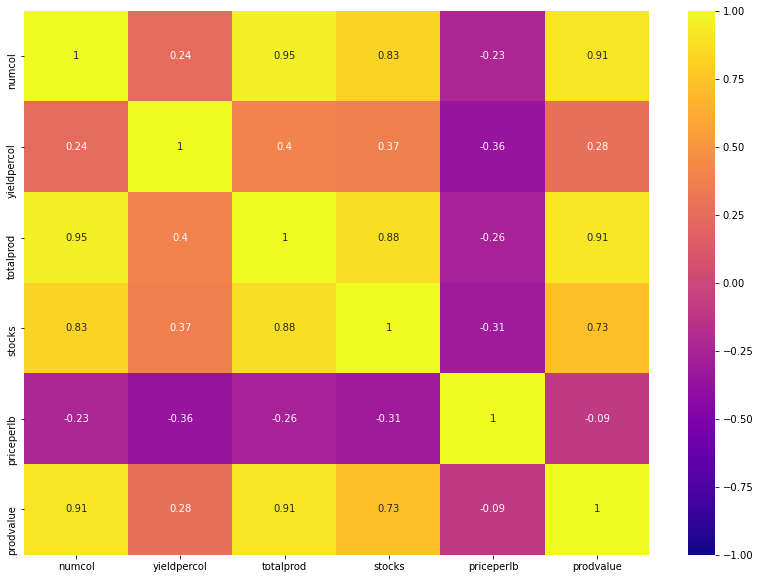

In [187]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1);

#### What is the general Production trend from 1998 to 2012? Describe visually

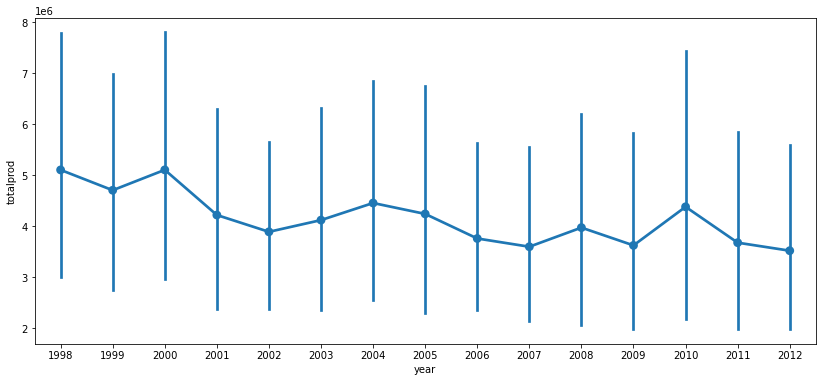

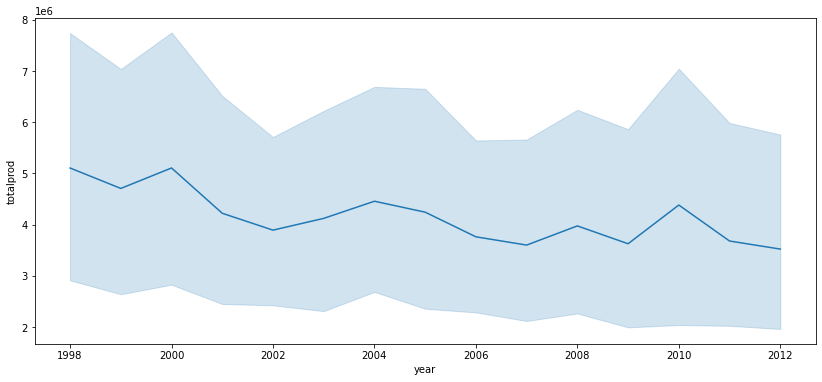

In [200]:
fig, ax = plt.subplots(figsize=(14,6))
sns.pointplot(x=mydata['year'], y=mydata['totalprod']);fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(x=mydata['year'], y=mydata['totalprod']);

#### How is the production trend for each State? Describe visually - Hint (Use sns.FacetGrid() & g.map() functions)

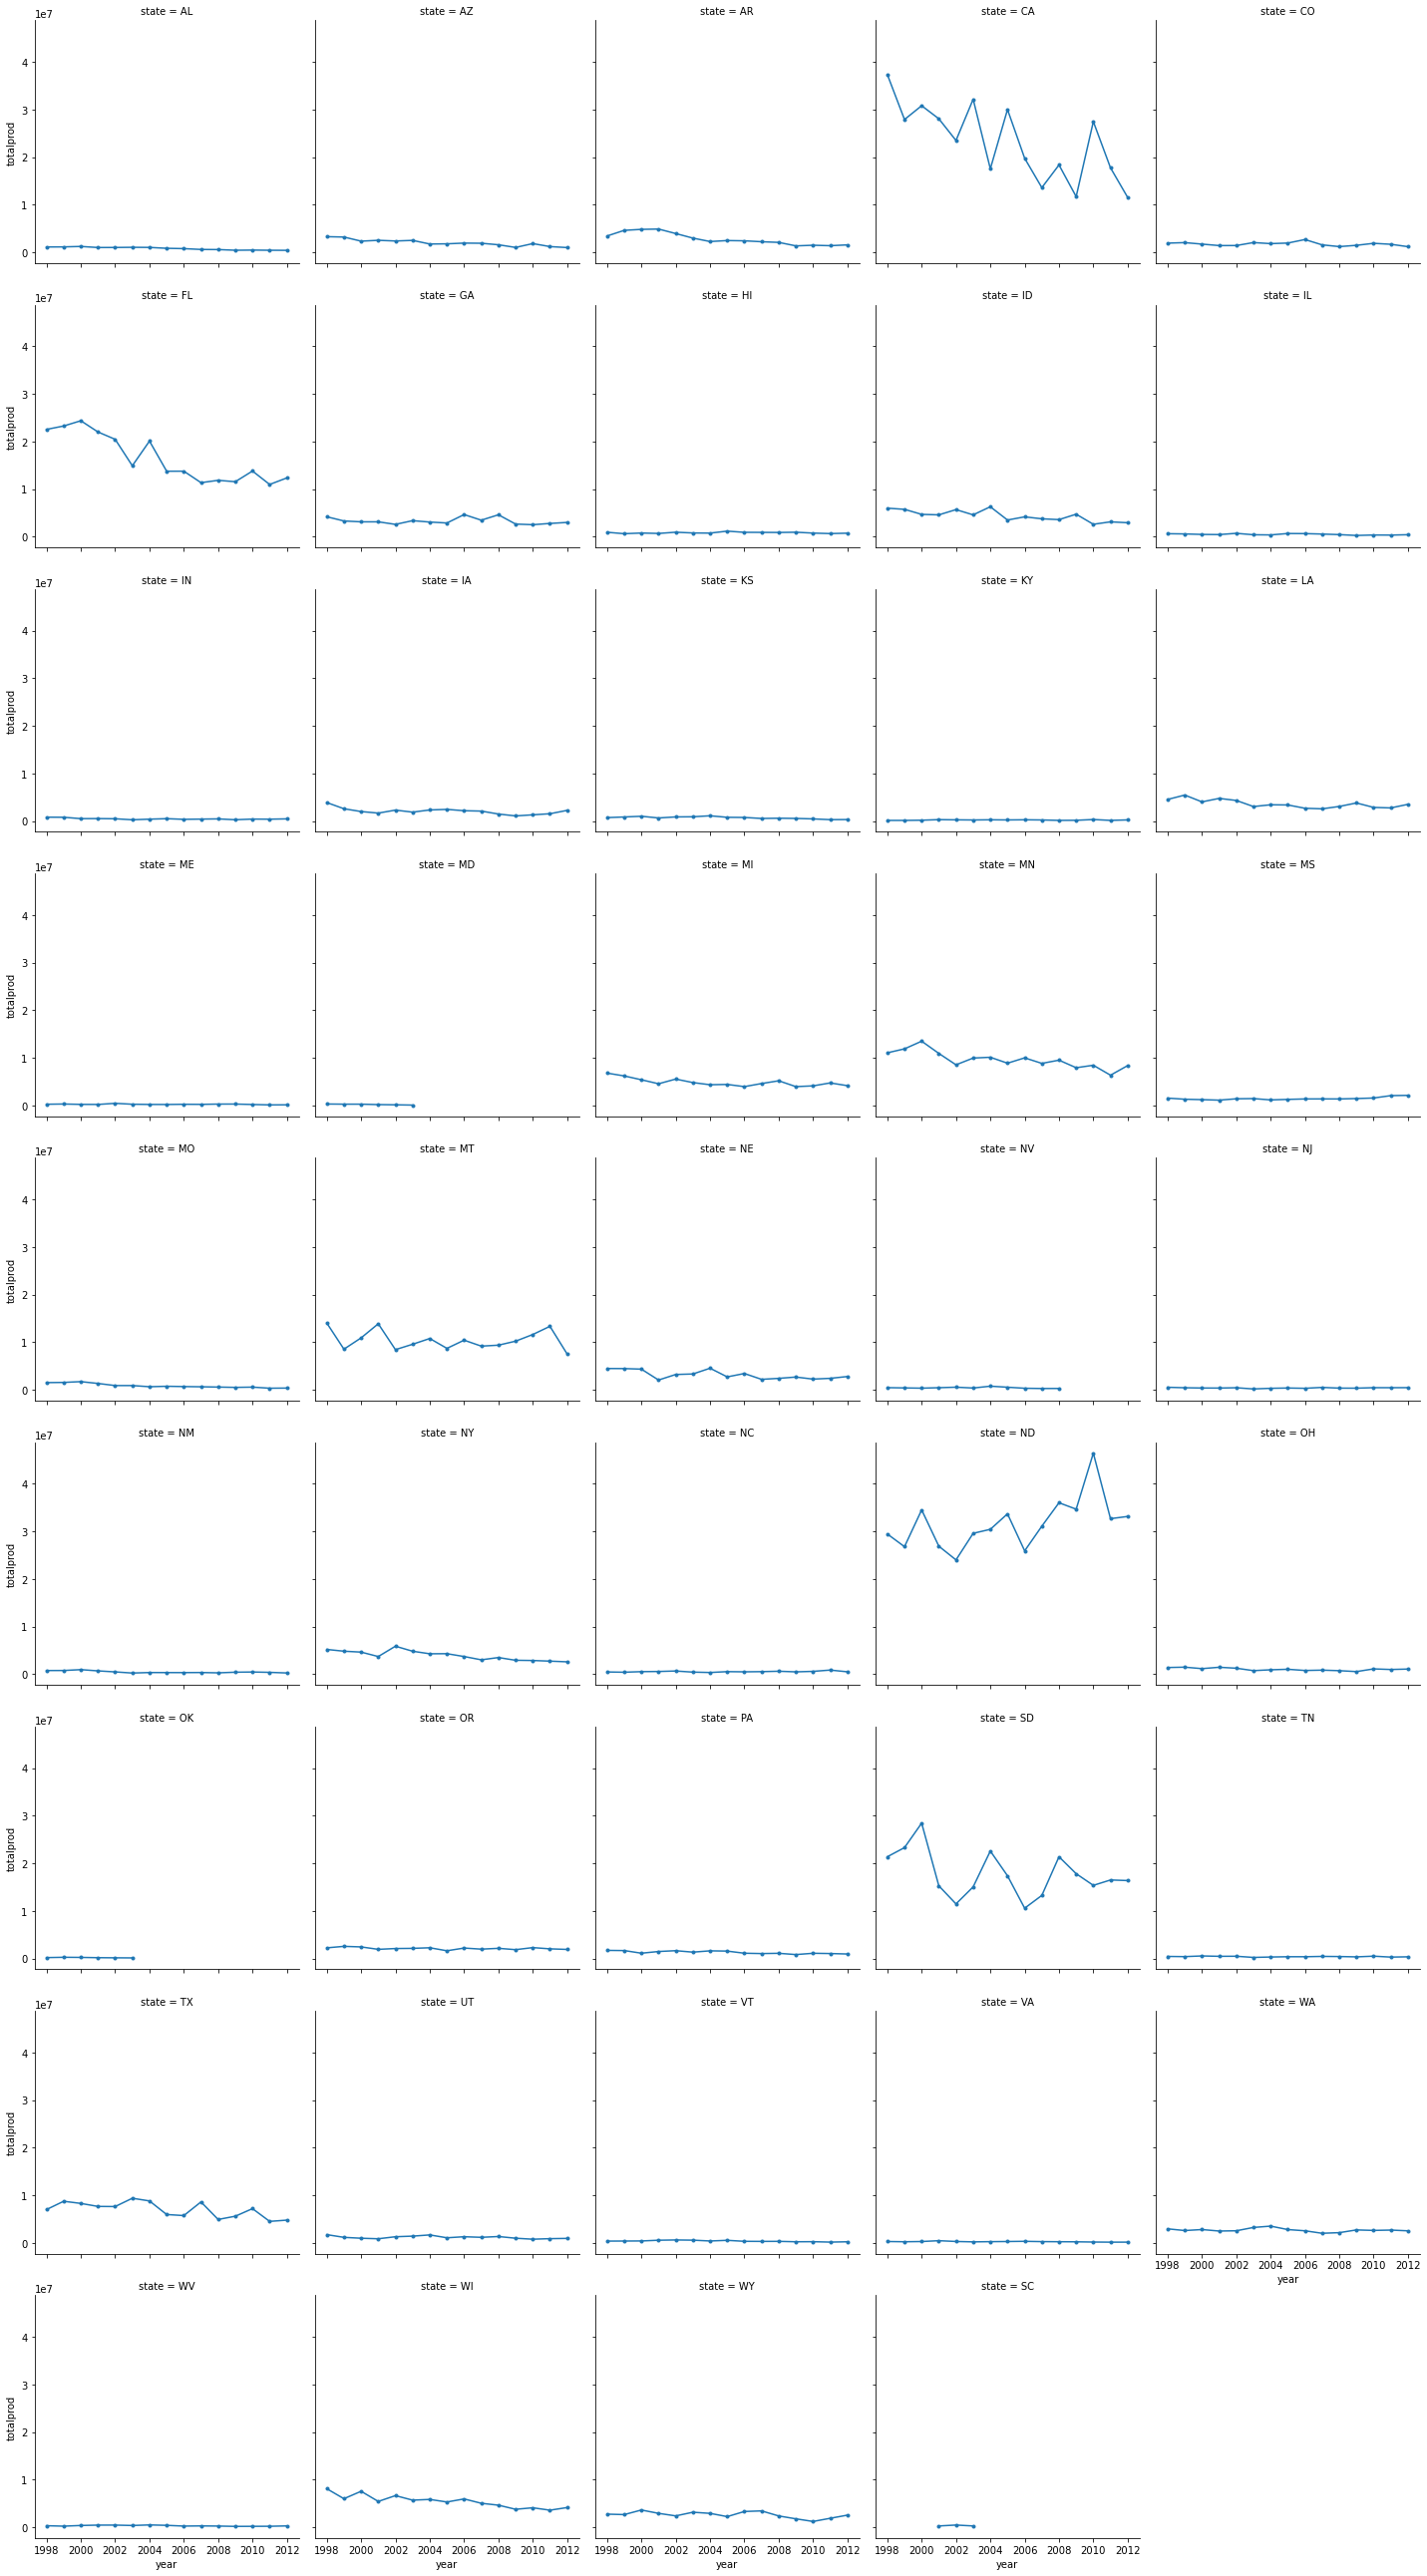

In [189]:
g = sns.FacetGrid(mydata, col="state", col_wrap=5, height=4)
g = g.map(plt.plot, "year", "totalprod", marker=".");

### Use stackchart to look at statewise honey production each year and overall USwide drop in honeyproduction 

https://stackoverflow.com/questions/59038979/stacked-bar-chart-in-seaborn

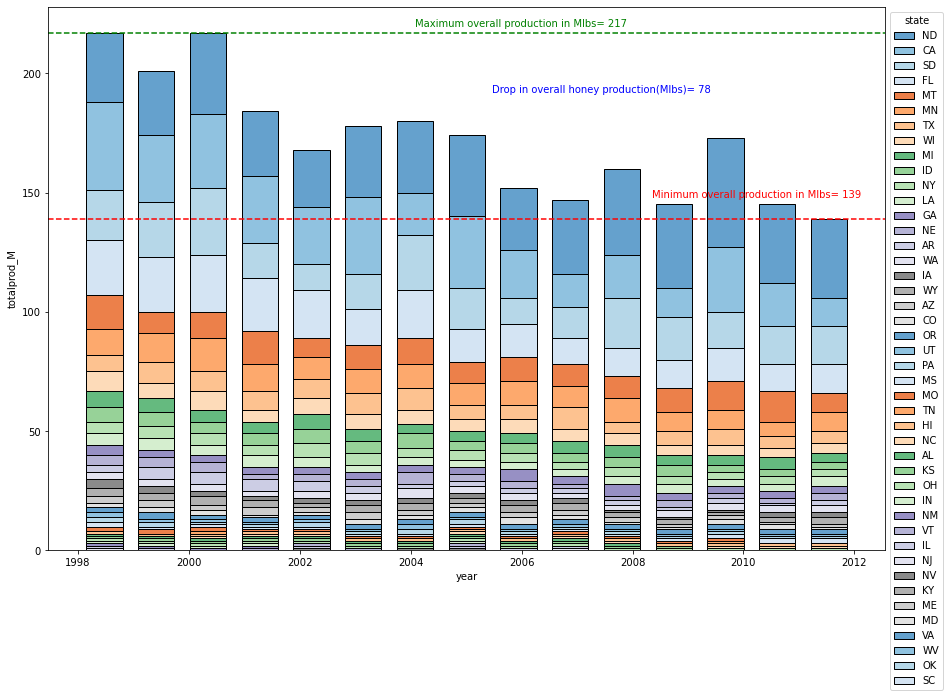

In [190]:
#
# Code for plotting staclchart
#
# 1st sort the dataframe in descending order of honey production
# Also capture overall honeyproduction every year and grab the maximum and minimum across the years of study
#
mydata2=mydata.sort_values(by='totalprod_M',ascending=False)
temp=mydata[['year','totalprod_M']].groupby('year').sum().round()
maxy=temp.max()[0]
miny=temp.min()[0]
#
# Capture decline in totalproduction
diff=maxy-miny
#
#
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(mydata2, x='year', hue='state', weights='totalprod_M',
             multiple='stack', palette='tab20c', bins=mydata.year.nunique(), shrink=0.7)
ax.set_ylabel('totalprod_M')
#
# Draw lines to indicate max and min annual totalproduction 
ax.axhline(maxy,ls='--',c="g")
ax.axhline(miny,ls='--',c="r")
#
# Annotate the max and min totalproduction lines with following code- note you can change values to relocate the text
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.7,maxy+4,"Maximum overall production in Mlbs= {:.0f}".format(maxy),color="green", transform=trans, ha="right", va="center")
ax.text(0.98,miny+10,"Minimum overall production in Mlbs= {:.0f}".format(miny),color="red", transform=trans, ha="right", va="center")
ax.text(0.8,15.+(maxy+miny)/2.,"Drop in overall honey production(Mlbs)= {:.0f}".format(diff),transform=trans,color="blue",ha="right", va="center")
#
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#

### Animate using plotly the total honey production in key states across the years to visualize the trends

https://plotly.com/python/line-and-scatter/
https://plotly.com/python-api-reference/plotly.express.html

In [191]:
# Consider only states with >8M lbs of honey production annually
#
mydata1=mydata[mydata['totalprod_M']>8.]
#
fig = px.scatter(mydata1, x='year', y='totalprod_M', animation_frame="year", range_x=[1998,2012],range_y=[2.,50.],hover_name='state',size='totalprod_M',color='state',text='state',width=1000,height=800,opacity=0.3)
#
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=1800
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration']=1800
#
pio.show(fig)

#### Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level, at state and year levels as well

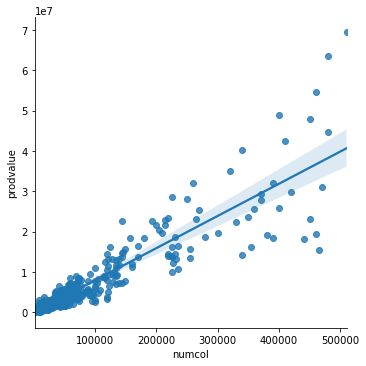

In [192]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata);

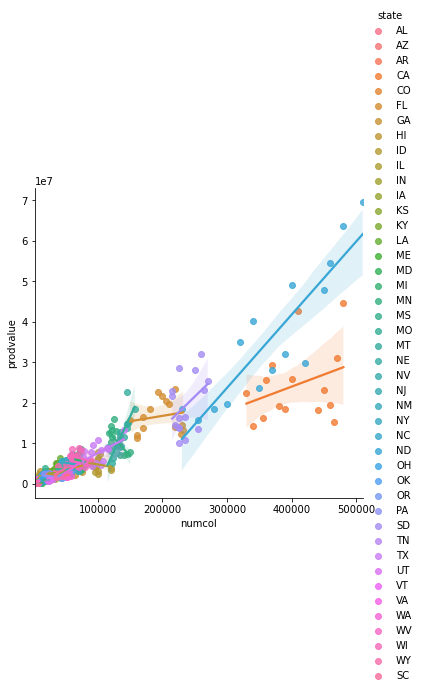

In [193]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='state')

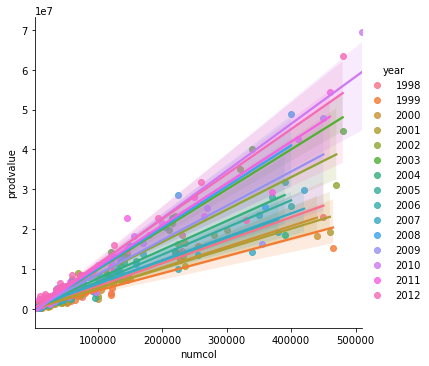

In [194]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='year')

#### Check the distribution of total prodcution across each year using boxplots

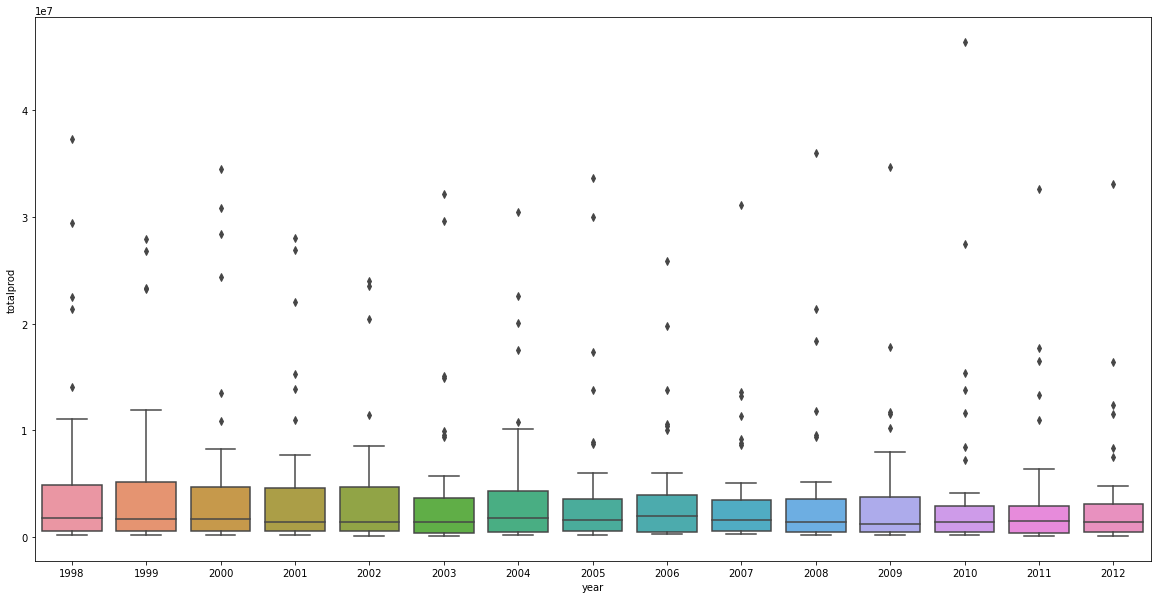

In [195]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='year',y='totalprod',data=mydata);

#### How has the Value in Production changed over the years?

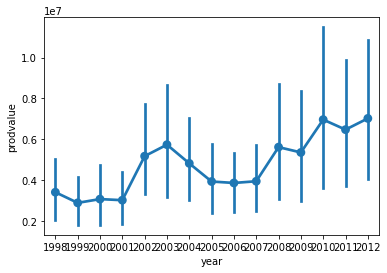

In [196]:
sns.pointplot(x=mydata['year'], y=mydata['prodvalue']);

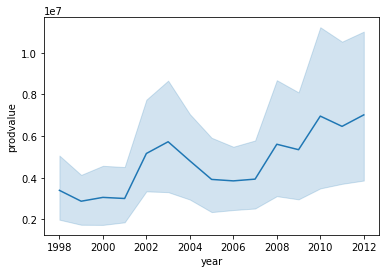

In [198]:
# Same plot above as line plot
sns.lineplot(x=mydata['year'], y=mydata['prodvalue']);

#### What is the linear relationship between Production volume & value over the years?

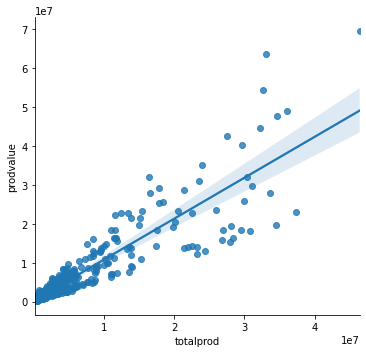

In [197]:
sns.lmplot(x="totalprod", y="prodvalue", data=mydata);

### Continue to study data further and comment your key insights observations that can be intergated into a descriptive analytics report on this case